In [7]:
# Analysis of Real Estate Sales from 2001 to 2016
#
# Notebook focus: Finding factors driving differences in Actual Sales' Values vs. Assessed Sales' Value; 
# Using Random Forest and a Decision Tree from the SKLearn Library to derive numerical results. 
#
# Author: Jane Nikolova
# Occupation: Senior Consultant
# All Rights Reserved. 
# Date: May, 2019
#
# Data Source - Real Estate Sales 2001-2016
# https://catalog.data.gov/dataset/real-estate-sales-2001-2016

# Libraries - SKLearn, Pandas, NumPy, Matplotlib 


import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import collections
from sklearn import tree
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from matplotlib import image
from sklearn.tree import export_graphviz

#Use data loading class to load & transform the data on a basic level - 
import DataFactory
dataFile = 'Real_Estate_Sales_2001-2016.csv'
XY = DataFactory.allDataForOutcome(dataFile, 'SalesRatio')
X = XY[0]
Y = XY[1]

# DATA PRE-PROCESSING -

# Check for highly correlated independent varibales and / or outliers / any other patterns that would require
# some form of pre-processing. 

# BUILD & FINE TUNE CUSTOM MODELS - 

#Create test & validation sets - 
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3)

#Simple Decision Tree - 
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(train_x, train_y)
test_score1 = clf.score(test_x, test_y)
print("###### Decision tree test score ######")
print(test_score1)

#Random Forest -
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2, max_features = 'sqrt')
RF_clf.fit(train_x, train_y)
test_score2 = RF_clf.score(test_x, test_y)
print("###### Random forest classifier - test score ######")
print(test_score2)

### Explore features scoring for both trees - i.e. prune and re-build models to 
### compare improved accuracy.

# Visualize data - TODO
reference_column_names_independent_vars = ['']


data_feature_names = reference_column_names_independent_vars
print(data_feature_names)
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('green', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(1):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('decision-tree-sf-data.png')

#Different method - 
# Show graph
Image(graph.create_png())
graph.write_pdf("decision-tree-sf-data.pdf")

#Feature importances - DT:
print(dict(zip(X.columns, clf.feature_importances_)))
print(dict(zip(X.columns, RF_clf.feature_importances_)))

#Define models performance using AUC / ROC -
print("###### AUC / ROC Estimators ######")

#Run again by dropping the least important features - i.e. check for dimensionality reduction optimization -  

#Check again - models performance using AUC / ROC -
print("###### AUC / ROC Estimators #2 ######")

#Does the reduction lead to better performance? 


ValueError: could not convert string to float: '03/01/2004 12:00:00 AM'

In [2]:

import seaborn as sns
sns.boxplot(x=X['Owner Role'])



NameError: name 'X' is not defined

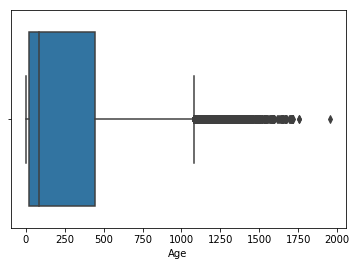

In [38]:
import seaborn as sns
sns.boxplot(x=X['Age'])